<a href="https://colab.research.google.com/github/urmilaahire26/DataScienceTask1/blob/main/DataScienceTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

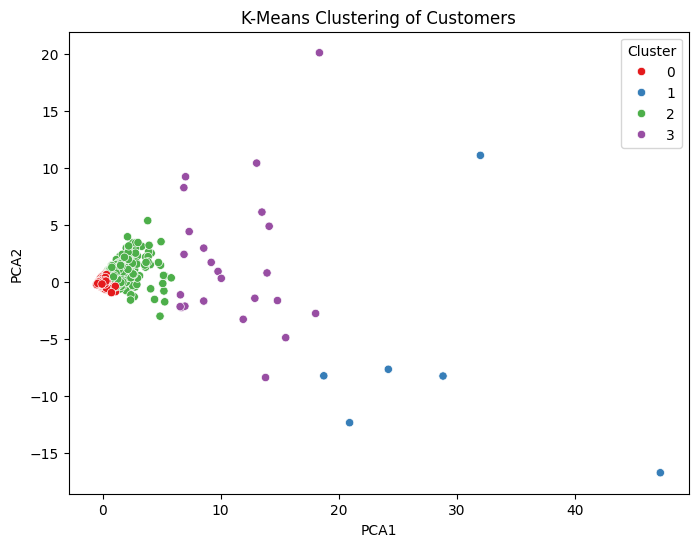

K-Means Silhouette Score: 0.7688


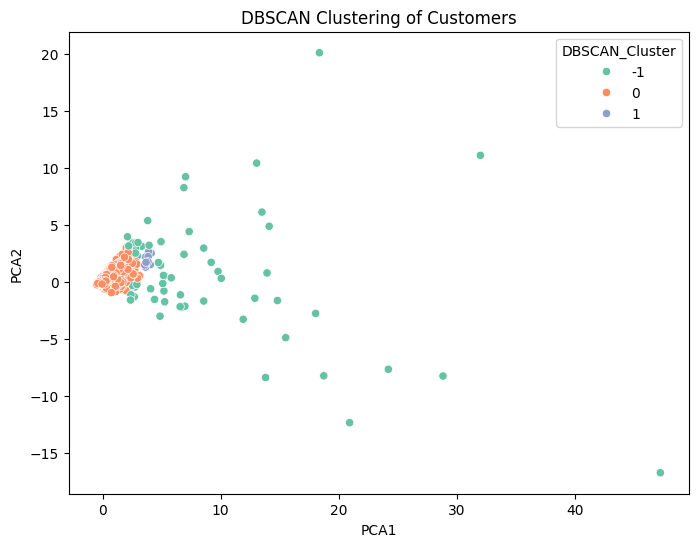

DBSCAN Silhouette Score: 0.8374


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
df = pd.read_excel(url)

# Data Cleaning and Preprocessing
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

# Filter out canceled transactions (InvoiceNo starts with 'C')
df = df[~df['InvoiceNo'].str.startswith('C')]

# Remove negative quantities (returns) and non-positive unit prices
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

# Create a new feature: TotalSpend per transaction
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']

# Aggregate the data by CustomerID (to analyze spending behavior)
customer_data = df.groupby('CustomerID').agg({
    'TotalSpend': 'sum',
    'Quantity': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index()

# Rename columns for easier understanding
customer_data.columns = ['CustomerID', 'TotalSpend', 'TotalQuantity', 'TotalTransactions']

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['TotalSpend', 'TotalQuantity', 'TotalTransactions']])

# Perform PCA (Principal Component Analysis) for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA data
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

# K-Means Clustering
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(pca_df)

# Add the Cluster information to the pca_df DataFrame for visualization
pca_df['Cluster'] = customer_data['Cluster']

# Plot K-Means Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('K-Means Clustering of Customers')
plt.show()

# Evaluate clustering using silhouette score for K-Means
sil_score = silhouette_score(pca_df[['PCA1', 'PCA2']], customer_data['Cluster'])
print(f'K-Means Silhouette Score: {sil_score:.4f}')

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
customer_data['DBSCAN_Cluster'] = dbscan.fit_predict(pca_df[['PCA1', 'PCA2']])

# Add DBSCAN cluster labels to pca_df for visualization
pca_df['DBSCAN_Cluster'] = customer_data['DBSCAN_Cluster']

# Plot DBSCAN Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=pca_df, palette='Set2')
plt.title('DBSCAN Clustering of Customers')
plt.show()

# Evaluate clustering using silhouette score for DBSCAN
sil_score_dbscan = silhouette_score(pca_df[['PCA1', 'PCA2']], customer_data['DBSCAN_Cluster'])
print(f'DBSCAN Silhouette Score: {sil_score_dbscan:.4f}')
